This document/post is made by Joonho Mark Lee. I wrote most of my codes and explanation based on the book "Introduction to Machine Learning with Python" by Andreas C Muller, and Sarah Guido. I am not making any money through this document and this is for myself to study.

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")

# K-Nearest Neighbors (Classification/ Regression)
- simplest machine learning algorithm.
- find out the nearest training point and use it to predict
- followings are binary dataset but we can also use it from multi-class datasets.

# Classification Sample

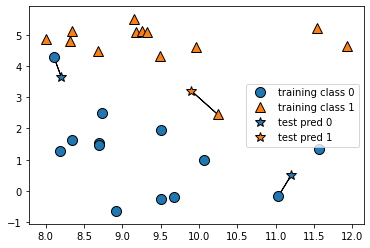

In [2]:
# Only find out 1 training point which is the nearest distance from test point.
mglearn.plots.plot_knn_classification(n_neighbors=1)

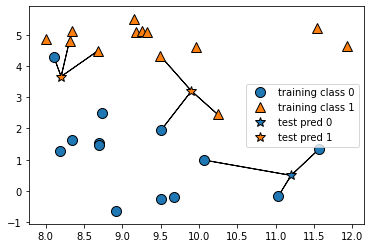

In [3]:
# Find out 3 training point which is the nearest distance from test point.
mglearn.plots.plot_knn_classification(n_neighbors=3)

# Regression Sample

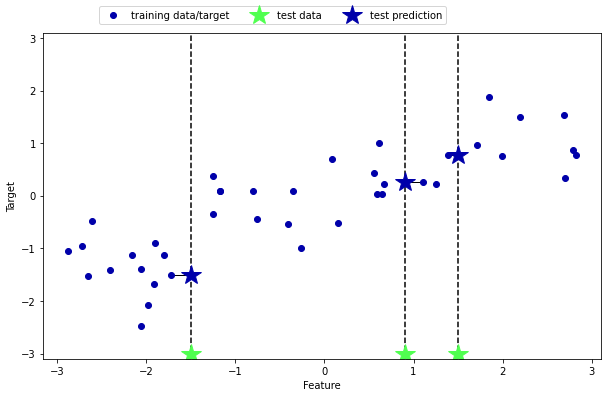

In [4]:
# Only find out 1 training point which is the nearest distance from test point.
mglearn.plots.plot_knn_regression(n_neighbors=1)

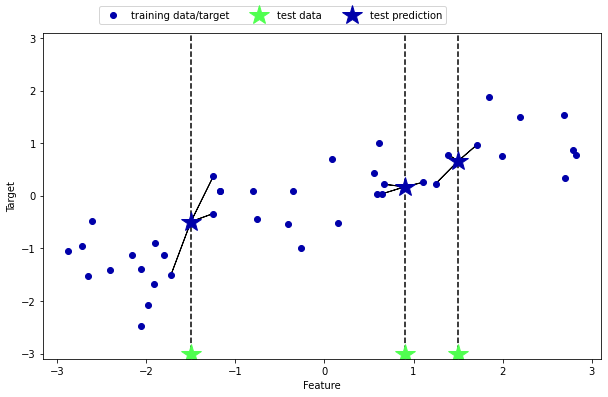

In [5]:
# Find out 3 training point which is the nearest distance from test point.
mglearn.plots.plot_knn_regression(n_neighbors=3)

# Scikit-learn: KNN Classification algorithm
#### Example 1: Forge Dataset

In [6]:
# load and split the dataset to evalute the quality
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# set the n_neighbors and the model
# n_neighbors means using n neighbors to predict the test data
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# training
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# scoring
print("Test Accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test Accuracy: 0.86


##### Analyze the KNN classification algorithm
- Above example is binary dataset so let's draw it!
- 1 neighbor make the model as same as training dataset. -> It can be over fitting
- 9 nieghbors make the decision boundary softer. -> It can be under fitting

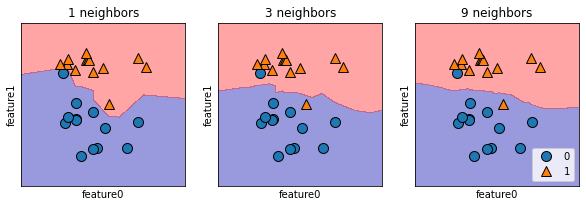

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")

axes[2].legend(loc=4)

#### Example 2: Breast Cancer
- from the following graph, low neighbors make high training accuracy and low test accuracy.
- low neighbors: Overfitting
- high neighbors looks ok but makes the test accuracy lower then middle amount neighbors.
- it happens because model becomes too simple to work.
- thus, best number of neighbors is 6 for following datasets and model.

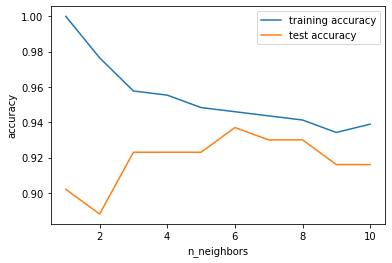

In [11]:
# load and split the dataset to evalute the quality
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # type is bunch
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state =66)
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)
for n in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

# Scikit-learn: KNN Regression algorithm
#### Example 1: Wave Dataset

In [12]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
# scoring
print("Test Accuracy: {:.2f}".format(reg.score(X_test, y_test)))

Test Accuracy: 0.83


#### Analyse KNeighborsRegressor
- 1 neighbor make the model as same as training dataset. -> It can be over fitting
- 9 nieghbors make the decision boundary softer. -> It can be under fitting

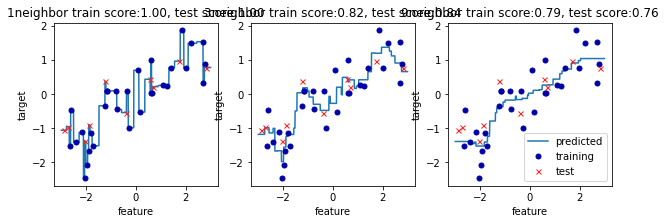

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

line=np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X,y)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, 'o', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'x', c=mglearn.cm2(1), markersize=5)
    ax.set_title("{}neighbor train score:{:.2f}, test score:{:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    axes[2].legend(["predicted", "training", "test"], loc=4)

# Conclusion
- Two important parameters
    * method to measure the distance between points -> usually use Euclidian distance method.(default = minkowski)
    * number of neighbors -> generally 3 or 5. It is important to control.
- Advantage
    * Easy to understand and use
- Disadvantage
    * Training set bigger(lots of feature or samples) -> takes long time to get prediction
    * preprocessing data is important

# More to do
- What is Euclidian distance?
- How to overcome these disadvantages? -> Linear Model